---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

# Working With Text & Regular Expressions

In [1]:
text1 = "Ethics are built right into the ideals and objectives of the United Nations "

len(text1) # The length of text1

76

In [2]:
text2 = text1.split(' ') # Return a list of the words in text2, separating by ' '.

len(text2)

14

In [3]:
text2

['Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations',
 '']

<br>
List comprehension allows us to find specific words:

In [4]:
[w for w in text2 if len(w) > 3] # Words that are greater than 3 letters long in text2

['Ethics',
 'built',
 'right',
 'into',
 'ideals',
 'objectives',
 'United',
 'Nations']

In [5]:
[w for w in text2 if w.istitle()] # Capitalized words in text2

['Ethics', 'United', 'Nations']

In [6]:
[w for w in text2 if w.endswith('s')] # Words in text2 that end in 's'

['Ethics', 'ideals', 'objectives', 'Nations']

<br>
We can find unique words using `set()`.

In [7]:
text3 = 'To be or not to be'
text4 = text3.split(' ')

len(text4)

6

In [8]:
len(set(text4))

5

In [9]:
set(text4)

{'To', 'be', 'not', 'or', 'to'}

In [10]:
len(set([w.lower() for w in text4])) # .lower converts the string to lowercase.

4

In [11]:
set([w.lower() for w in text4])

{'be', 'not', 'or', 'to'}

### Processing free-text

regular expressions

In [12]:
text5 = '"Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'
text6 = text5.split(' ')

text6

['"Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations"',
 '#UNSG',
 '@',
 'NY',
 'Society',
 'for',
 'Ethical',
 'Culture',
 'bit.ly/2guVelr']

<br>
Finding hastags:

In [17]:
[w for w in text6 if w.startswith('#')]
# same as 
[w for w in text5.split() if w.startswith('#')]

['#UNSG']

<br>
Finding callouts:

In [14]:
[w for w in text6 if w.startswith('@')]

['@']

In [18]:
text7 = '@UN @UN_Women "Ethics are built right into the ideals and objectives of the United Nations" \
#UNSG @ NY Society for Ethical Culture bit.ly/2guVelr'
text8 = text7.split(' ')

<br>

We can use regular expressions to help us with more complex parsing. 

For example `'@[A-Za-z0-9_]+'` will return all words that: 
* start with `'@'` and are followed by at least one: 
* capital letter (`'A-Z'`)
* lowercase letter (`'a-z'`) 
* number (`'0-9'`)
* or underscore (`'_'`)

In [19]:
import re # import re - a module that provides support for regular expressions

[w for w in text8 if re.search('@[A-Za-z0-9_]+', w)]
# not output @ but the word following @ 

['@UN', '@UN_Women']

In [20]:
[w for w in text8 if re.search('@\w+', w)]

['@UN', '@UN_Women']

In [22]:
text12 = 'fsadfdasg jrduy'
re.findall(r'[^fga]', text12) # find specific characters 

['s', 'd', 'd', 's', ' ', 'j', 'r', 'd', 'u', 'y']

###### Date Variations

In [28]:
date = ['23-10-2002', '23/10/2002', '23/10/02', '10/23/2002', '23 Oct 2002', '23 October 2002', 'Oct 23, 2002', 'October 23, 2002']
date

['23-10-2002',
 '23/10/2002',
 '23/10/02',
 '10/23/2002',
 '23 Oct 2002',
 '23 October 2002',
 'Oct 23, 2002',
 'October 23, 2002']

In [24]:
dateStr = '23-10-2002\n23/10/2002\n23/10/02\n10/23/2002\n23 Oct 2002\n23 October 2002\nOct 23, 2002,\nOctober 23, 2002\n'
dateStr

'23-10-2002\n23/10/2002\n23/10/02\n10/23/2002\n23 Oct 2002\n23 October 2002\nOct 23, 2002,\nOctober 23, 2002\n'

In [27]:
re.findall(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', dateStr)

['23-10-2002', '23/10/2002', '23/10/02', '10/23/2002']

In [31]:
re.findall(r'\d{2} (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{4}', dateStr)
# the whitespace matters
# actually match the whole thing. but the bracket also means the scope, that only want things matched in the bracket
# special symbol ?: to indicate it is a scoping operating operator, but do not puul out just what matched here.

['Oct']

In [32]:
re.findall(r'\d{2} (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{4}', dateStr)

['23 Oct 2002']

In [33]:
re.findall(r'\d{2} (?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* \d{4}', dateStr)

['23 Oct 2002', '23 October 2002']

In [34]:
re.findall(r'(?:\d{2} )?(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* (?:\d{2}, )?\d{4}', dateStr)

['23 Oct 2002', '23 October 2002', 'Oct 23, 2002', 'October 23, 2002']

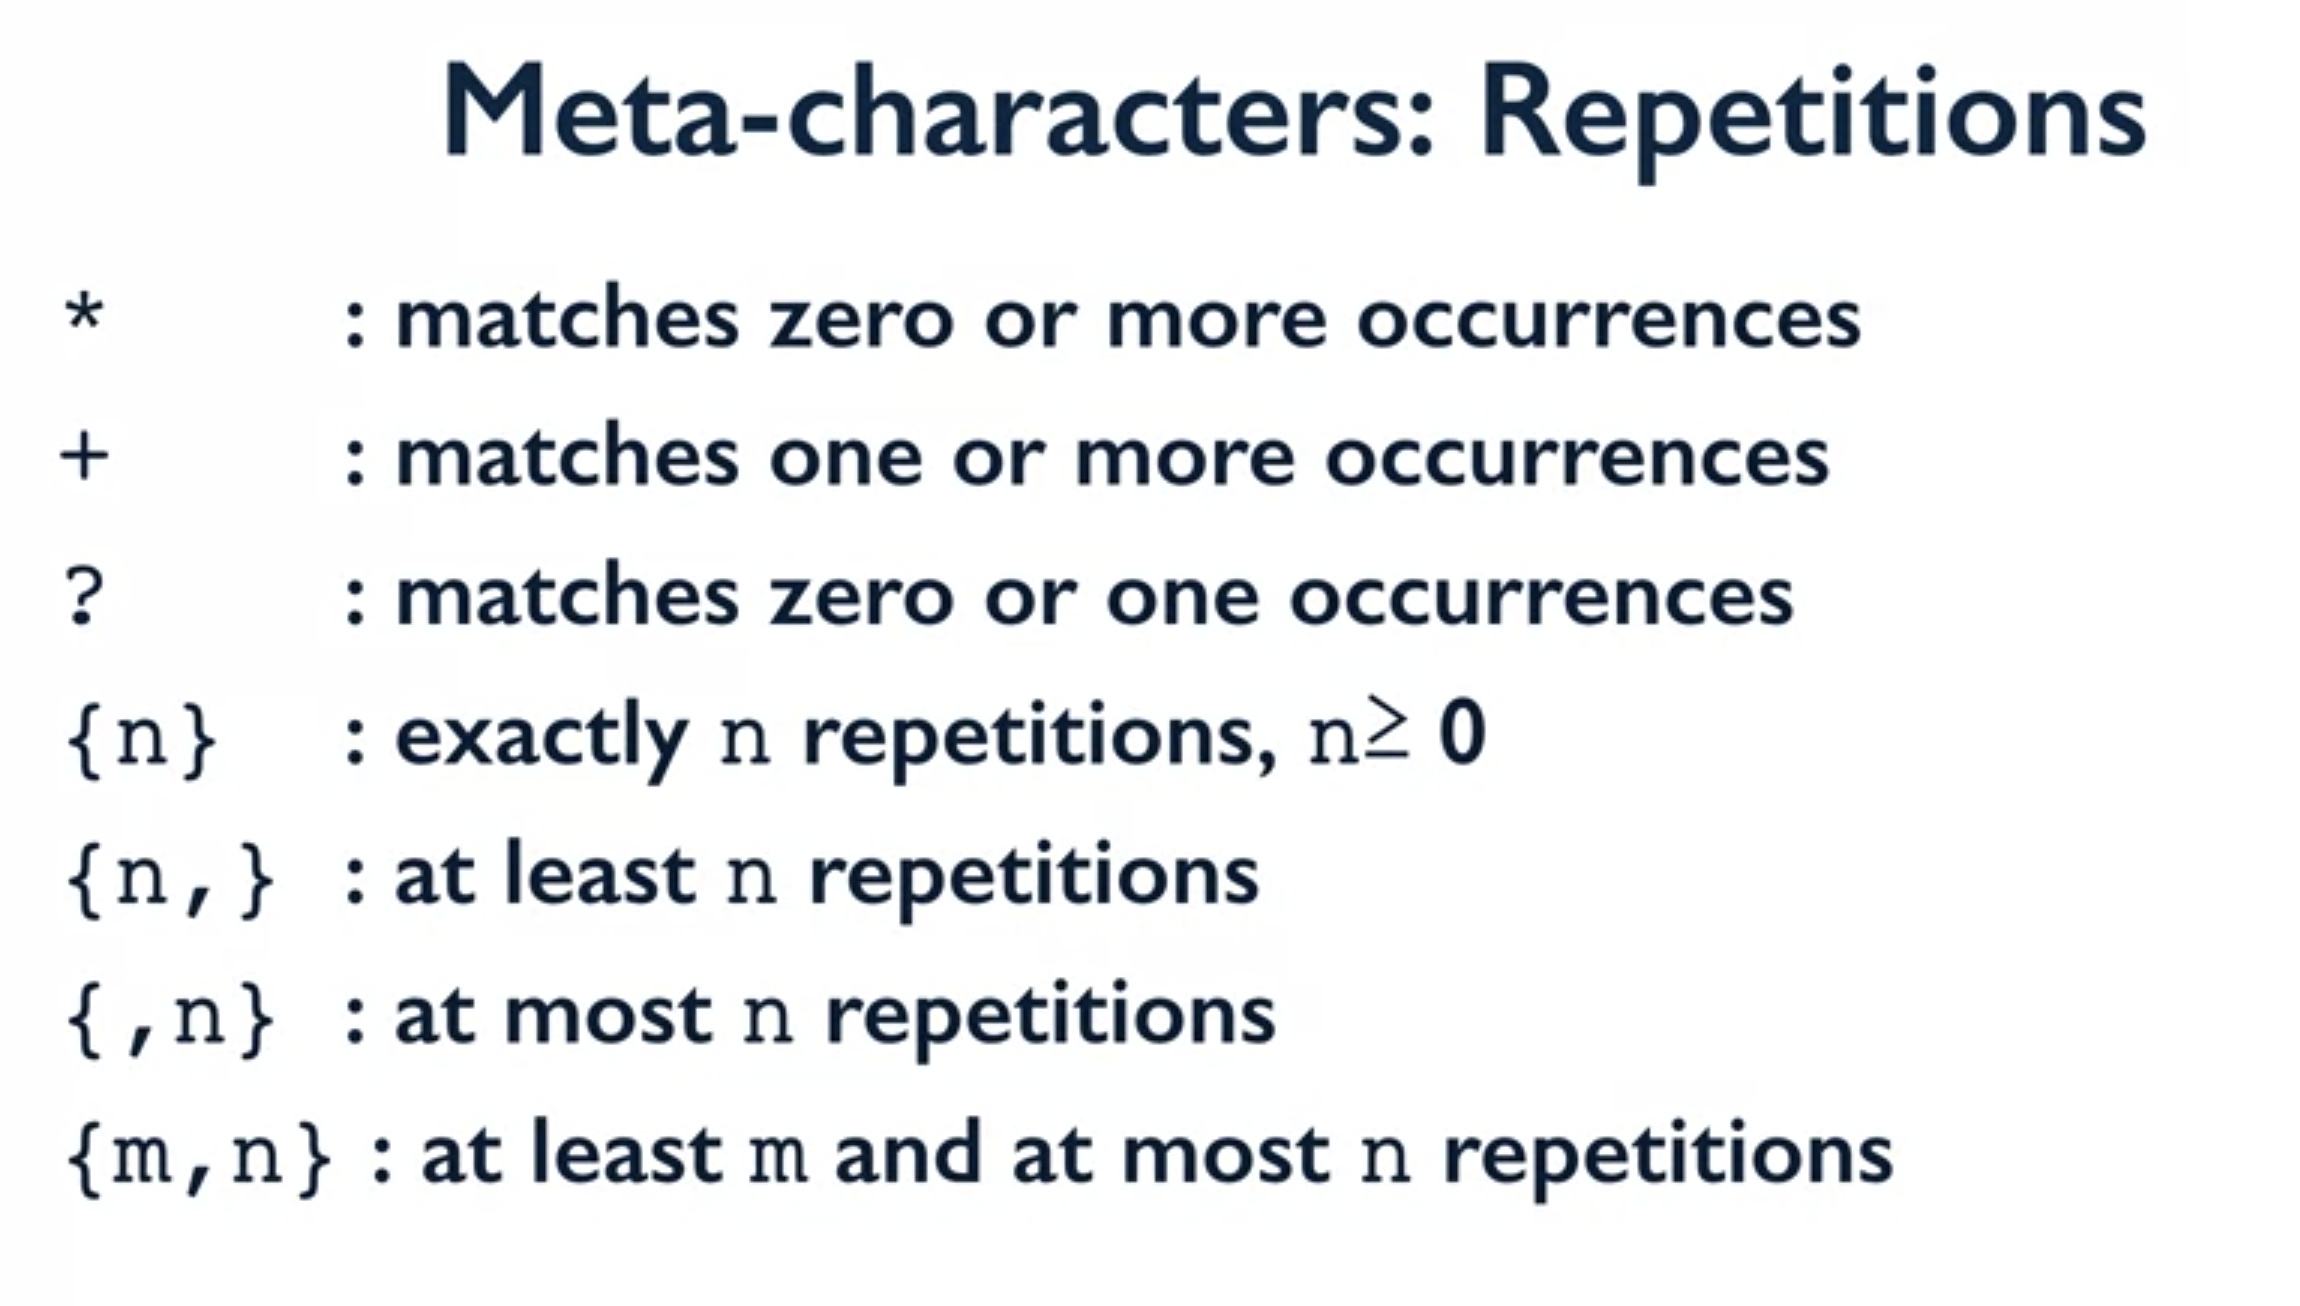

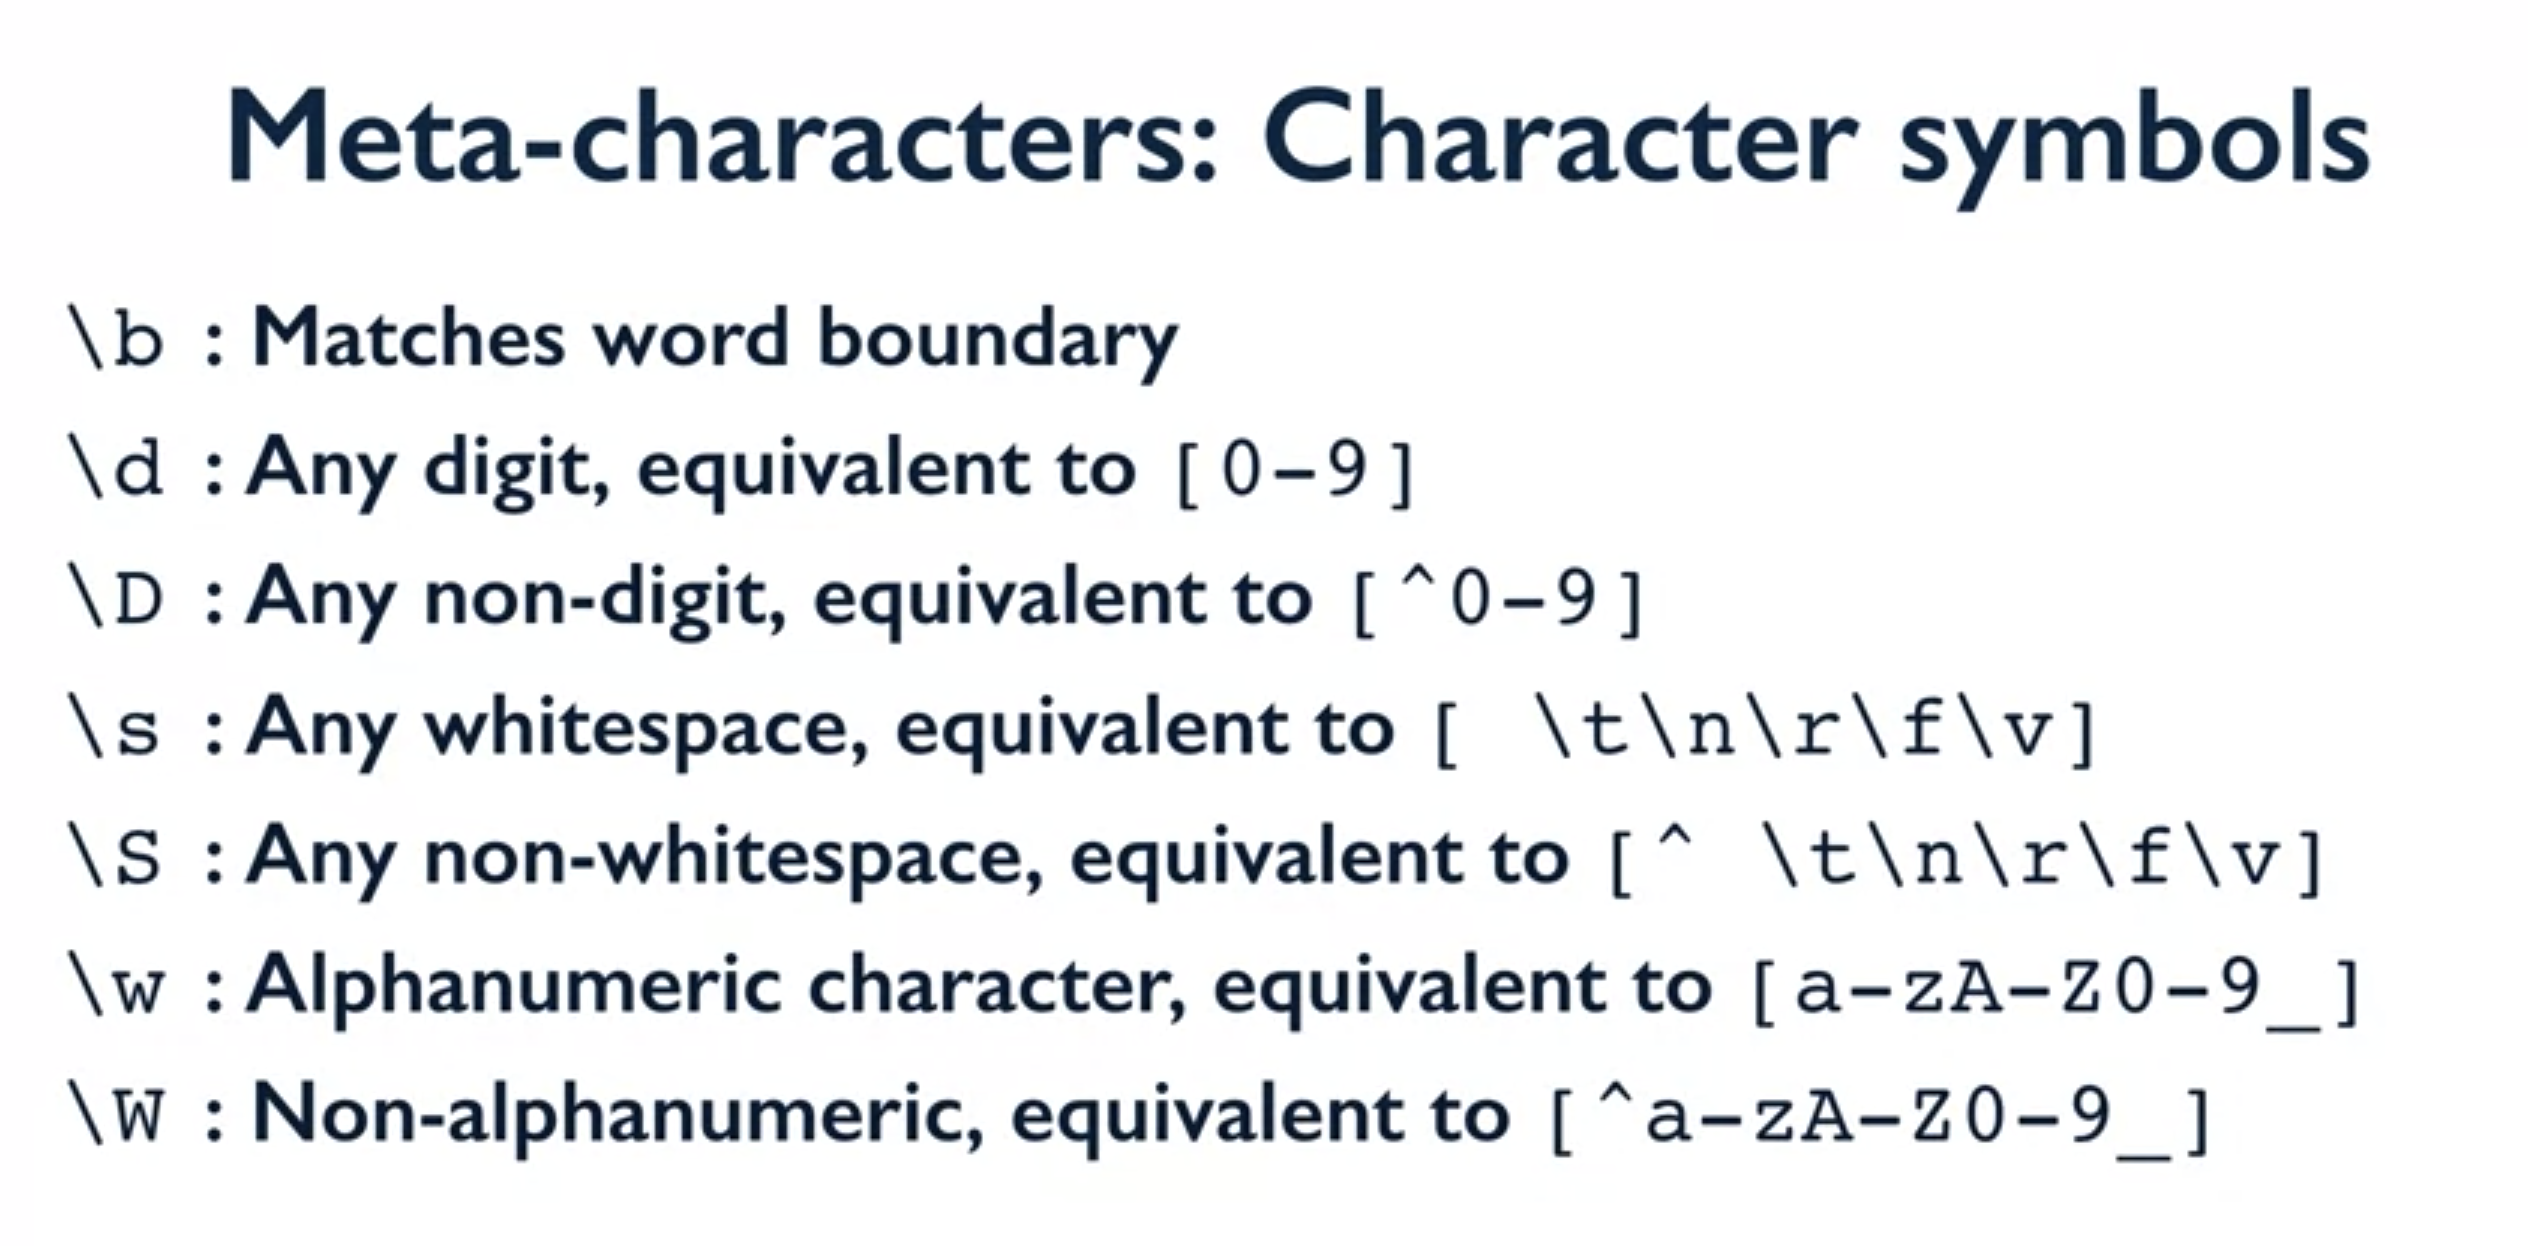

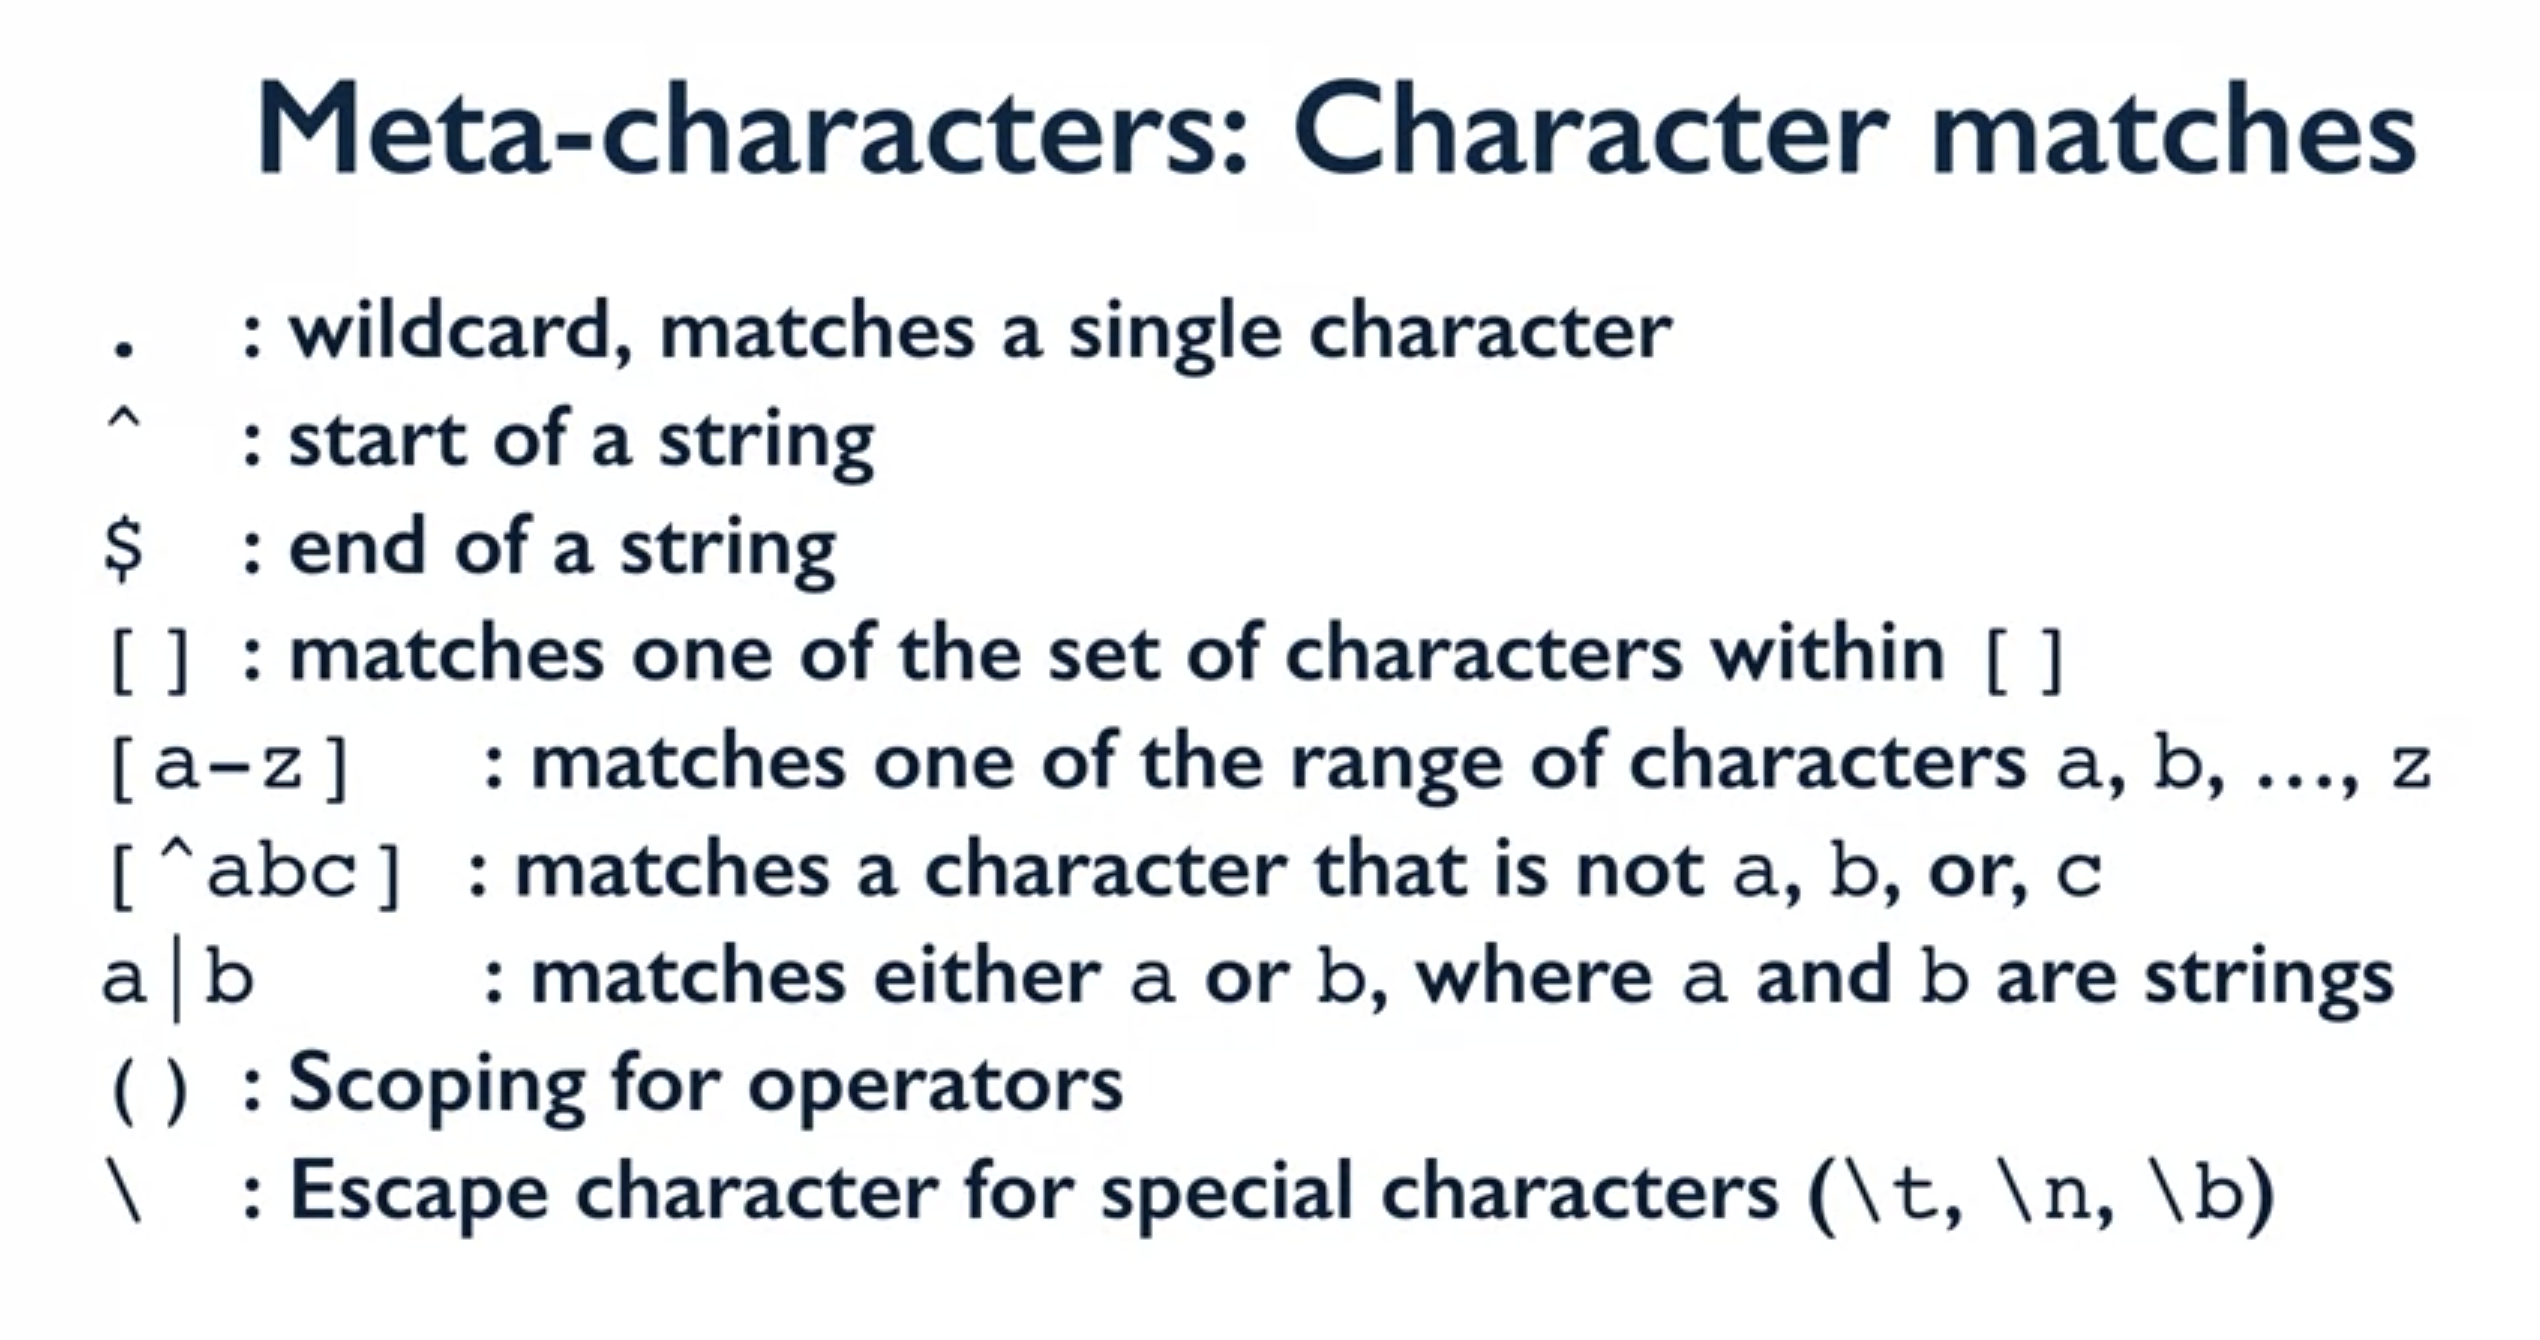

^xyz # begin with xyz

xyz$ # end with xyz